<a href="https://colab.research.google.com/github/Utsuk7/SMS-Spam-Detection/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
url="/content/spam.csv"
import chardet
with open(url, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result
df= pd.read_csv(url,encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
df.shape

(5572, 5)

In [17]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [18]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [22]:
df.sample(10)

,target,text
5118,ham,Are you driving or training?
1810,ham,"Now, whats your house # again ? And do you hav..."
3082,ham,K..k:)how about your training process?
2399,ham,Oh... Kay... On sat right?
558,ham,Hi Princess! Thank you for the pics. You are v...
5406,ham,Dear are you angry i was busy dear
300,ham,"Awesome, I remember the last time we got someb..."
472,ham,Nothing. I meant that once the money enters yo...
4400,ham,Many times we lose our best ones bcoz we are
1482,ham,Ok...


In [25]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()

In [27]:
df['target']=encoding.fit_transform(df['target'])

In [28]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Mandatory Steps

In [29]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [31]:
df.duplicated().sum()

403

In [35]:
df=df.drop_duplicates(keep='first')

In [36]:
df.duplicated().sum()

0

# EDA

In [37]:
# check percentage of data which is spam and ham respectively
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

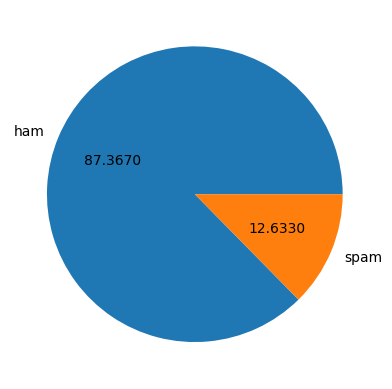

In [43]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%.4f")
plt.show() #data is imbalance

In [44]:
import nltk

In [46]:
df['len_characters']=df['text'].apply(len)
df.head()

,target,text,len_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [49]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [50]:
df['len_word']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [51]:
df.head()

,target,text,len_characters,len_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [52]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [53]:
df[['len_characters','len_word','num_sentences']].describe()

,len_characters,len_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [57]:
df[df['target']==0][['len_characters','len_word','num_sentences']].describe()

,len_characters,len_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
df[df['target']==1][['len_characters','len_word','num_sentences']].describe()

,len_characters,len_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='len_characters', ylabel='Count'>

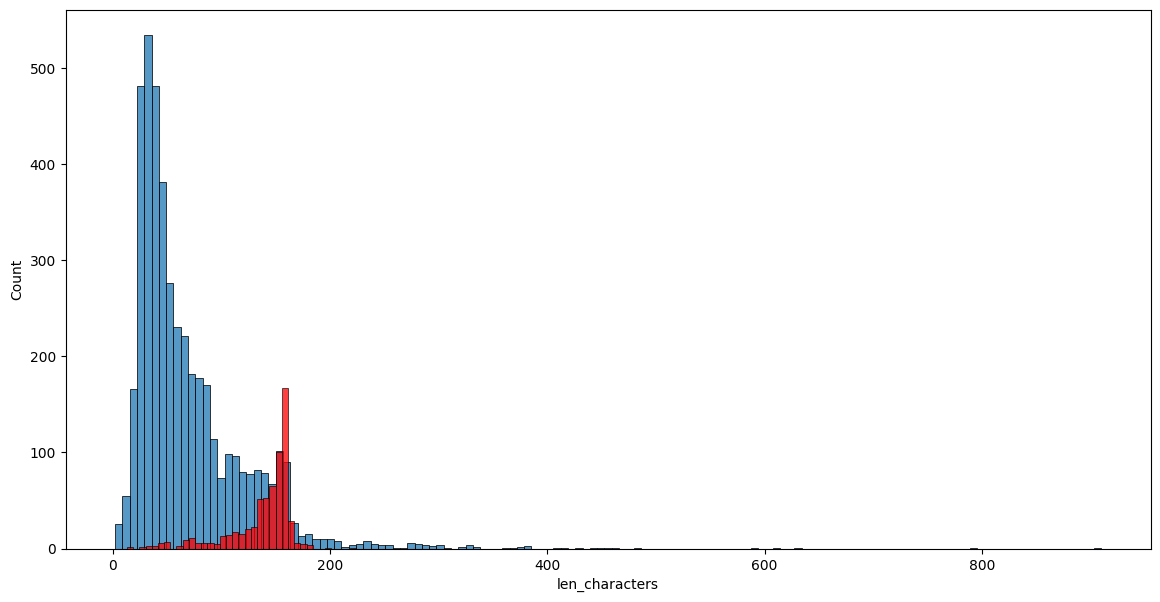

In [74]:
plt.figure(figsize=(14,7))
sns.histplot(df[df['target']==0]['len_characters'])
sns.histplot(df[df['target']==1]['len_characters'],color='r')

<Axes: xlabel='len_word', ylabel='Count'>

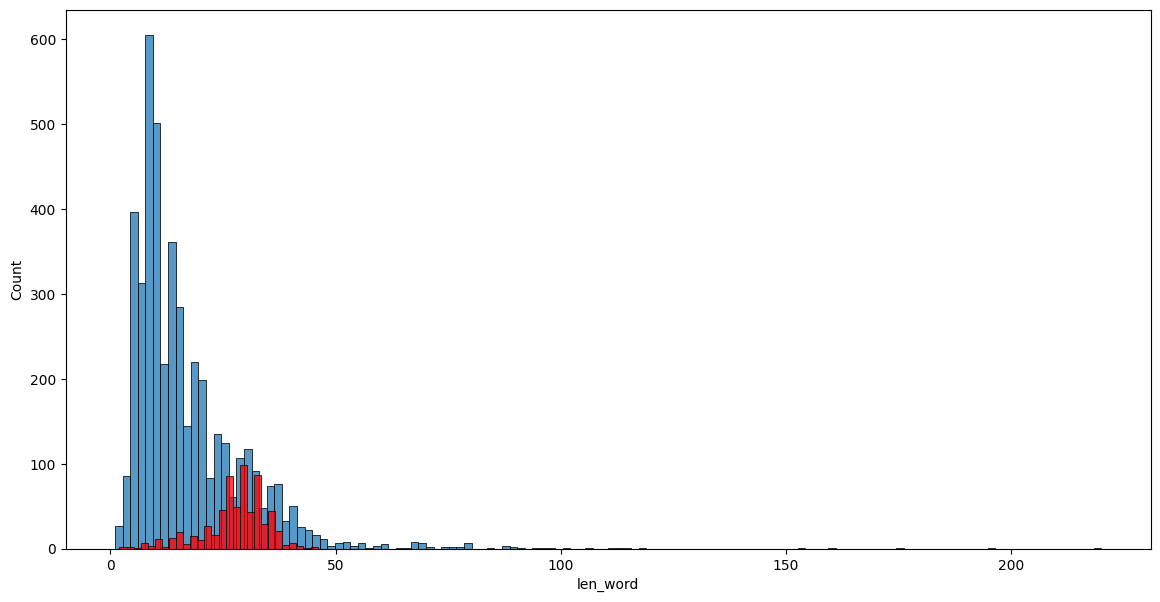

In [76]:
plt.figure(figsize=(14,7))
sns.histplot(df[df['target']==0]['len_word'])
sns.histplot(df[df['target']==1]['len_word'],color='r')

<Axes: xlabel='num_sentences', ylabel='Count'>

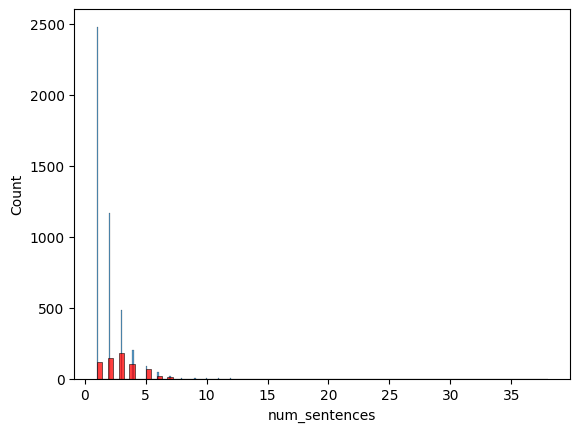

In [78]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='r')

<ipython-input-85-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

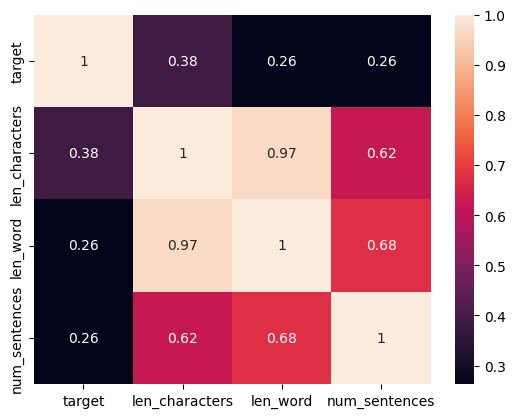

In [85]:
sns.heatmap(df.corr(),annot=True)

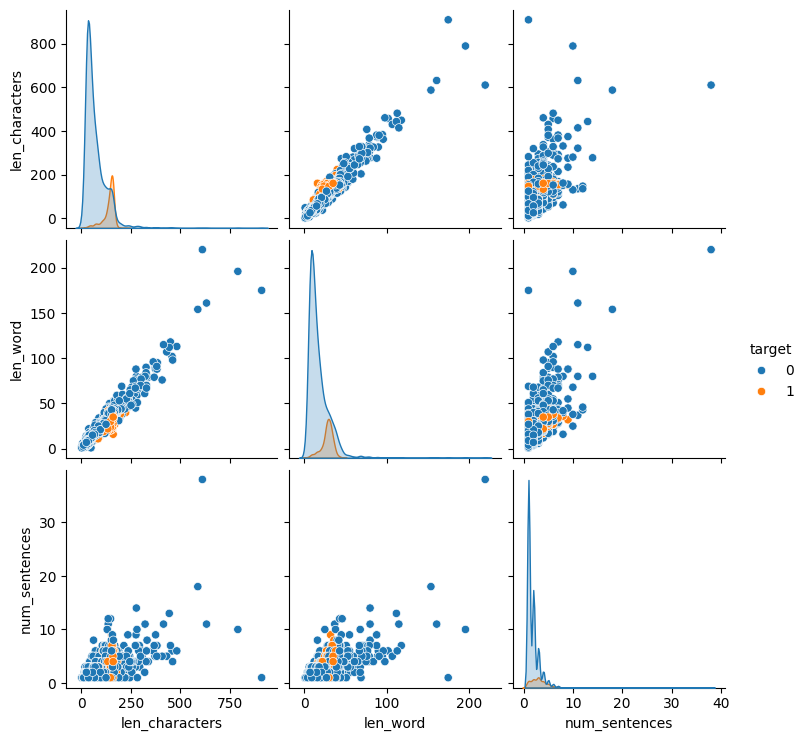

In [83]:
sns.pairplot(df,hue='target')
plt.show()